In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import dsp_lib

In [2]:
def upscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * np.floor(coeff)

def downscale_to_i16(signal):
    max_i16 = 32767
    print(max(signal))
    print(max(signal.real))
    print(max(signal.imag))
    coeff = max_i16 / max(max(signal.real), max(signal.imag))
    print(coeff)
    return signal * (coeff)

In [3]:
file_path = "qpsk_rrc_float64.bin"
data_type = 'float64'

source_samples = dsp_lib.read_signal(file_path, data_type, 0, 0, '')


[[18697.87791542]
 [ 6672.07781678]
 [-4055.41141936]
 [ 9945.37868609]
 [22064.29081344]
 [ 7620.55071617]
 [-4539.02943478]
 [ 9047.34772756]
 [18568.76387389]
 [ 5136.27059306]]
[[18697.87791542]
 [ 6672.07781678]
 [-4055.41141936]
 [ 9945.37868609]
 [22064.29081344]
 [ 7620.55071617]
 [-4539.02943478]
 [ 9047.34772756]
 [18568.76387389]
 [ 5136.27059306]]


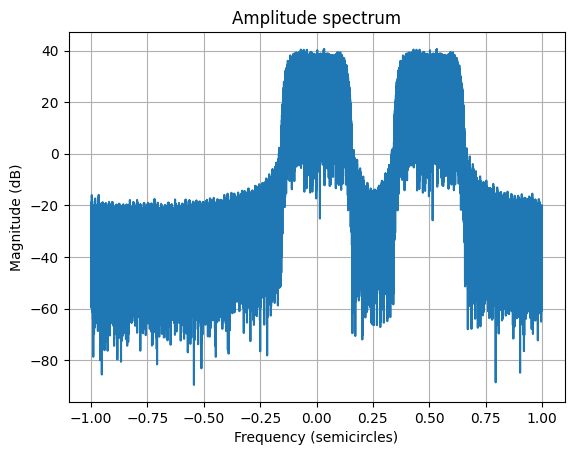

array([[-24.30309322],
       [-48.54320777],
       [-31.04074208],
       ...,
       [-29.13879826],
       [-29.82228019],
       [-25.28101789]])

In [4]:

dsp_lib.sum_double_val(8, 9)
dsp_lib.make_cmplx_sig(source_samples)

sig = dsp_lib.make_cmplx_sig(source_samples)
dsp_lib.plot_spectrum(sig, 0)

In [5]:
N = 129
Fs = 1
T_symb = 8
s_rrc = dsp_lib.gen_rrc_filter_impulse_response(N, Fs, T_symb)

[-70636.31684162+38290.02694208j -66494.080695  +51025.60234207j
 -60864.47684462+59542.47731323j -53944.84428538+63393.44456114j
 -46121.15214789+62746.29034193j -37972.44492852+58076.56915904j
 -29917.60036842+50069.50475023j -22179.54451027+39839.24197774j
 -15105.91427112+28772.09101644j  -9127.43926659+18029.03589776j]


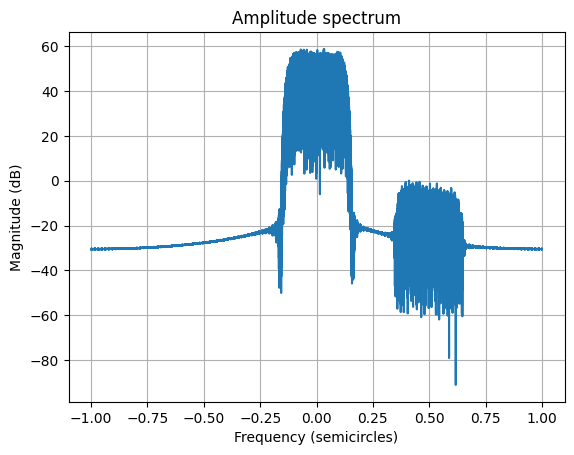

In [6]:
sig_rrc = np.convolve(sig, s_rrc, 'same')
print(sig_rrc[len(sig_rrc) - 10:])
dsp_lib.plot_spectrum(sig_rrc, 1)
dsp_lib.save_cmplx_sig(sig_rrc, "qpsk_rrc_after_py_rrc_fl64.bin", 'float64')

[-70636.33 +38290.023j -66494.086+51025.605j -60864.477+59542.477j
 -53944.848+63393.44j  -46121.16 +62746.293j -37972.45 +58076.57j
 -29917.6  +50069.504j -22179.545+39839.242j -15105.913+28772.092j
  -9127.438+18029.035j]


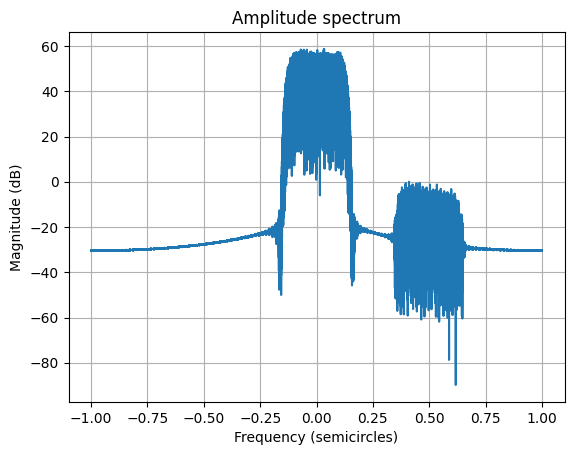

[-0.00527526 -0.00399103 -0.00164843  0.00129551]
[-0.00527526 -0.00399103 -0.00164843  0.00129551]
<class 'numpy.float64'>
9.253751671184363e-11


In [7]:
sig_fl32 = np.array(sig,  dtype=np.csingle)
s_rrc_fl32 = np.array(s_rrc, dtype = np.float32)
sig_rrc_fl32 = np.convolve(sig_fl32, s_rrc_fl32, 'same')
print(sig_rrc_fl32[len(sig_rrc_fl32) - 10:])
dsp_lib.save_cmplx_sig(sig_rrc_fl32, "qpsk_rrc_after_py_rrc_fl32.bin", data_type='float32')
dsp_lib.plot_spectrum(sig_rrc_fl32, 2)
print(s_rrc[:4])
print(s_rrc_fl32[:4])
print(type(s_rrc[0]))
print(s_rrc[0] - s_rrc_fl32[0])

In [8]:
sig_rrc_scaled = downscale_to_i16(sig_rrc)
max(sig_rrc_scaled)

(121042.19035425548+1329.2877303291896j)
121042.19035425548
121081.54807305771
0.270619268761159


np.complex128(32756.34904291763+359.730873554866j)

In [9]:
max(sig_rrc)

np.complex128(121042.19035425548+1329.2877303291896j)

In [10]:
sig_rrc[-10:]

array([-70636.31684162+38290.02694208j, -66494.080695  +51025.60234207j,
       -60864.47684462+59542.47731323j, -53944.84428538+63393.44456114j,
       -46121.15214789+62746.29034193j, -37972.44492852+58076.56915904j,
       -29917.60036842+50069.50475023j, -22179.54451027+39839.24197774j,
       -15105.91427112+28772.09101644j,  -9127.43926659+18029.03589776j])